# Phishing Site Detector

Dataset from https://www.kaggle.com/taruntiwarihp/phishing-site-urls

The task is to create a model which returns if the given URL is phishing site or not.

Place the dataset and this notebook in the same folder to run without any errors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data= pd.read_csv("phishing_site_urls.csv")
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549351 entries, 0 to 549350
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549351 non-null  object
 1   Label   549351 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [3]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [4]:
data.shape

(549351, 2)

<Axes: xlabel='Label', ylabel='count'>

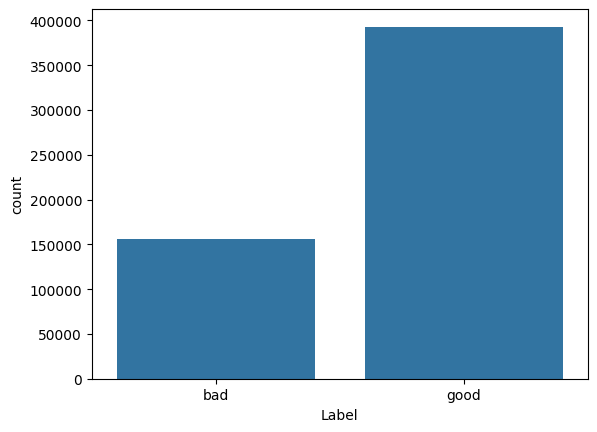

In [5]:
import seaborn as sns
sns.countplot(x="Label",data=data)

* We need to remove all special characters from the url and convert into a list of words. We can do this using regextokenizer
* We need to take the processed string and convert into English words
* When we do the above steps, the words will be separated with commas. This will make the process of converting into numbers harder.
* So we shall remove the commas and make it more like a sentence (to humans this sentence may not make any sense but machines can make sense )

In [6]:
#remove special characters using regex and convert them into tokens (aka list of words )
from nltk.tokenize import RegexpTokenizer 
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
data['tokens'] = data.URL.map(lambda t: tokenizer.tokenize(t))

In [7]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
data['english_words'] = data['tokens'].map(lambda l: [stemmer.stem(word) for word in l])

 Sidenote: Lambda functions are one liner functions which can be used to do any task.
 Instead of using def keyword to define a function we can use lambda to make one liners

In [8]:
data.head()

,URL,Label,tokens,english_words
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [9]:
data['sentences'] = data['english_words'].map(lambda l: ' '.join(l))
# So basically we are replacing commas with empty spaces.

### Machine learning algorithm

We shall convert the sentences column to vectors (aka the format which our model can understand and interpret) and we shall split the data into training and test sets using train_test_split

* CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

feature = CountVectorizer().fit_transform(data.sentences)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(feature, data.Label, test_size = 0.15)
#split data into train and test sets

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
np.random.seed(45)
model = LogisticRegression(C=15.0, solver = 'liblinear', intercept_scaling = 3)
model.fit(X_train,y_train)
accuracy = model.score(X_test, y_test)
print(f'The model scores {accuracy*100} %')

The model scores 98.05953666735434 %


In [13]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
np.random.seed(45)
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train,y_train)
accuracy = randomforestmodel.score(X_test, y_test)
print(f'The random forest model scores {accuracy*100} %')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(45)
decisionmodel = DecisionTreeClassifier()
decisionmodel.fit(X_train,y_train)
accuracy = decisionmodel.score(X_test, y_test)
print(f'The decision tree model scores {accuracy*100} %')

In [ ]:
from sklearn.svm import SVC
np.random.seed(45)
svcmodel = SVC()
svcmodel.fit(X_train,y_train)
accuracy = svcmodel.score(X_test, y_test)
print(f'The svc forest model scores {accuracy*100} %')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
np.random.seed(45)
multimodel = MultinomialNB()
multimodel.fit(X_train,y_train)
accuracy = multimodel.score(X_test, y_test)
print(f'The multinomial model scores {accuracy*100} %')

In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(45)
gaussmodel = GaussianNB()
gaussmodel.fit(X_train,y_train)
accuracy = gaussmodel.score(X_test, y_test)
print(f'The gauss model scores {accuracy*100} %')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(45)
knmodel = KNeighborsClassifier()
knmodel.fit(X_train,y_train)
accuracy = knmodel.score(X_test, y_test)
print(f'The knn model scores {accuracy*100} %')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(45)
gbmodel = GradientBoostingClassifier()
gbmodel.fit(X_train,y_train)
accuracy = gbmodel.score(X_test, y_test)
print(f'The gradient boosting model scores {accuracy*100} %')

In [ ]:
x_new  = 'https://dlscordapp.codes/billing/promotions/rJSuZk5ySk6Sf6qnk4v9bHEG/'


In [ ]:
from sklearn.pipeline import make_pipeline
api_pipeline = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression(C=15.0, solver = 'liblinear', intercept_scaling = 3))

In [ ]:
trainX, testX, trainY, testY = train_test_split(data.URL, data.Label)

In [ ]:
api_pipeline.fit(trainX,trainY)

In [ ]:
api_pipeline.score(testX,testY)

In [ ]:
import pickle
pickle.dump(api_pipeline,open('phishing.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.predict(['https://www.linkedin.com'])
print(result)

In [ ]:
result = loaded_model.predict(['https://dlscordapp.codes/billing/promotions/rJSuZk5ySk6Sf6qnk4v9bHEG/'])
print(result)

In [ ]:
type(result)